Investigate River Tides in Nowcast v201702 versus Observations

In [43]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd

from salishsea_tools import data_tools

%matplotlib inline

### Model Results

In [78]:
sshCove = nc.Dataset('/results/SalishSea/nowcast-blue/12dec17/SandyCove.nc').variables['sossheig'][:, 0, 0]
sshSand = nc.Dataset('/results/SalishSea/nowcast-blue/12dec17/SandHeads.nc').variables['sossheig'][:, 0, 0]
sshWood = nc.Dataset('/results/SalishSea/nowcast-blue/12dec17/WoodwardsLanding.nc').variables['sossheig'][:, 0, 0]
sshNewWest = nc.Dataset('/results/SalishSea/nowcast-blue/12dec17/NewWestminster.nc').variables['sossheig'][:, 0, 0]

sshCove = np.append(sshCove, nc.Dataset('/results/SalishSea/nowcast-blue/13dec17/SandyCove.nc').variables['sossheig'][:, 0, 0])
sshSand = np.append(sshSand, nc.Dataset('/results/SalishSea/nowcast-blue/13dec17/SandHeads.nc').variables['sossheig'][:, 0, 0])
sshWood = np.append(sshWood, nc.Dataset('/results/SalishSea/nowcast-blue/13dec17/WoodwardsLanding.nc').variables['sossheig'][:, 0, 0])
sshNewWest = np.append(sshNewWest, nc.Dataset('/results/SalishSea/nowcast-blue/13dec17/NewWestminster.nc').variables['sossheig'][:, 0, 0])

In [79]:
mmCove = np.mean(sshCove)
mmSand = np.mean(sshSand)
mmWood = np.mean(sshWood)
mmNewWest = np.mean(sshNewWest)

In [90]:
modeltime = (pd.DataFrame(columns=['NULL'],
                  index=pd.date_range('2017-12-12T00:05:00Z', '2017-12-13T23:55:00Z',
                                      freq='10T'))
#       .index.strftime('%Y-%m-%dT%H:%M:%SZ')
#       .tolist()
)

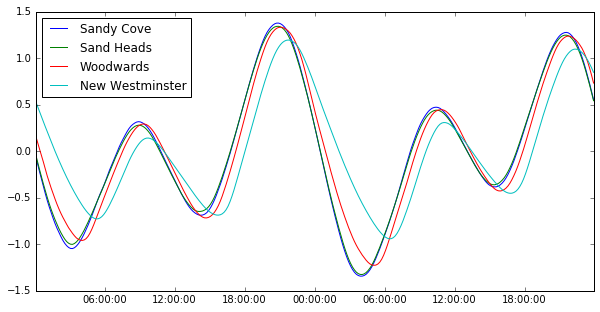

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(modeltime.index, sshCove - mmCove, label="Sandy Cove")
ax.plot(modeltime.index, sshSand - mmSand, label="Sand Heads")
ax.plot(modeltime.index, sshWood - mmWood, label="Woodwards")
ax.plot(modeltime.index, sshNewWest - mmNewWest, label="New Westminster")
ax.legend(loc='best')

### Observations

In [82]:
obsCove = data_tools.get_chs_tides('obs', 'Sandy Cove', '2017-12-12', '2017-12-14')
obsSand = data_tools.get_chs_tides('obs', 'Sand Heads', '2017-12-12', '2017-12-14')
obsWood = data_tools.get_chs_tides('obs', 'Woodwards Landing', '2017-12-12', '2017-12-14')
obsNewWest = data_tools.get_chs_tides('obs', 'New Westminister', '2017-12-12', '2017-12-14')

In [83]:
moCove = np.mean(obsCove)
moSand = np.mean(obsSand)
moWood = np.mean(obsWood)
moNewWest = np.mean(obsNewWest)

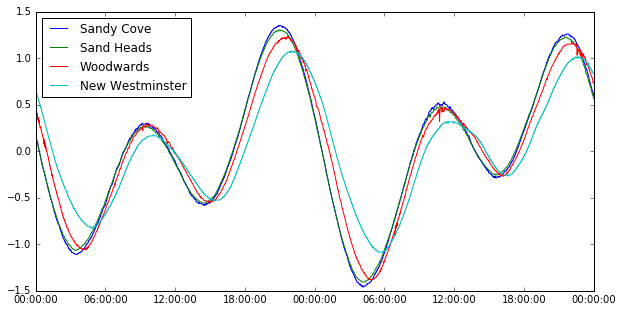

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(obsCove - moCove, label="Sandy Cove")
ax.plot(obsSand - moSand, label="Sand Heads")
ax.plot(obsWood - moWood, label="Woodwards")
ax.plot(obsNewWest - moNewWest, label="New Westminster")
ax.legend(loc='best')

### Comparison

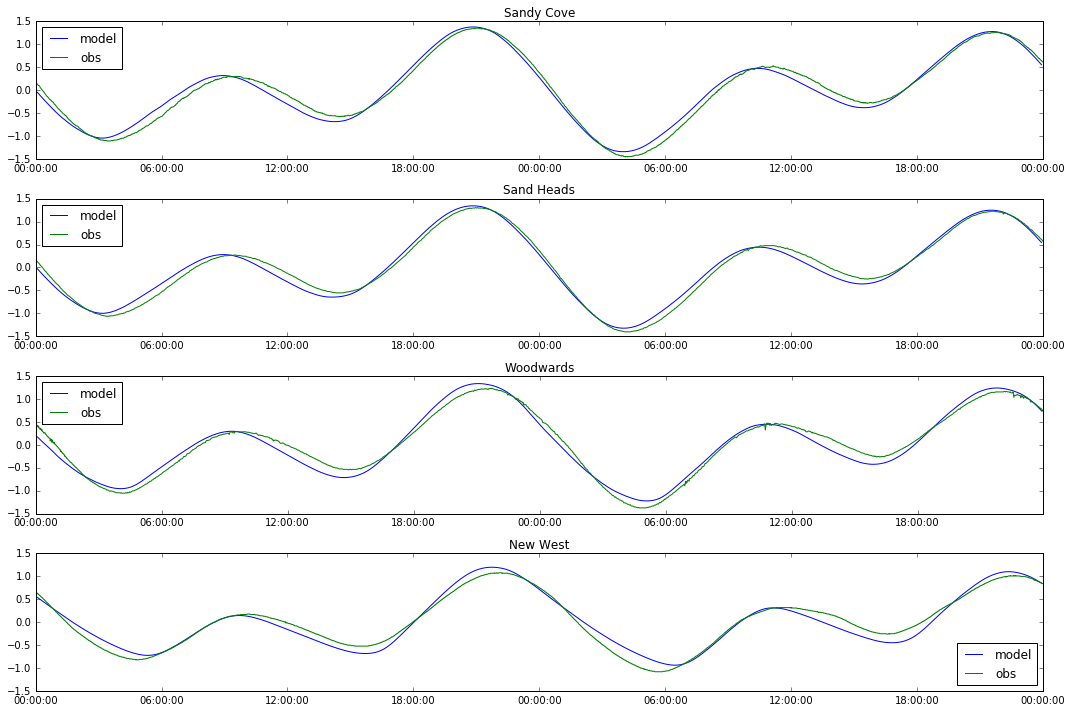

In [92]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))
axs[0].plot(modeltime.index, sshCove - mmCove, label="model")
axs[1].plot(modeltime.index, sshSand - mmSand, label="model")
axs[2].plot(modeltime.index, sshWood - mmWood, label="model")
axs[3].plot(modeltime.index, sshNewWest - mmNewWest, label="model")
axs[0].plot(obsCove - moCove, label="obs")
axs[1].plot(obsSand - moSand, label="obs")
axs[2].plot(obsWood - moWood, label="obs")
axs[3].plot(obsNewWest - moNewWest, label="obs")
axs[0].set_title('Sandy Cove')
axs[1].set_title('Sand Heads')
axs[2].set_title('Woodwards')
axs[0].legend(loc='best')
axs[1].legend(loc='best')
axs[2].legend(loc='best')
axs[3].legend(loc='best')
axs[3].set_title('New West')
fig.tight_layout()

Much of the difference in phase between the observations and the model at Sandy Cove and Woodwards are due to unmodelled tides.  You can see this using the corrected tides on the nowcast webpage results.

At Woodwards and especially at New West we see a strongly distorted tidal wave with a shortened rise and lengthened fall.  This is due to the friction of the wave, stronger during lower water.  Note however that the model tides are too distorted, thus too frictional.